In [1]:
# 箱ひげ図による外れ値の確認
import pandas as pd
import plotly.express as px

df = pd.read_parquet("../result/penguins.parquet")
px.box(df, x="Species_Short", y="Body_Mass")

In [3]:
# 分位点による外れ値の確認
df.groupby("Species_Short", observed=True)["Body_Mass"].quantile(
    q=[0, 0.01, 0.05, 0.95, 0.99, 1],
)

Species_Short      
Adelie         0.00    2850.0
               0.01    2875.0
               0.05    3000.0
               0.95    4487.5
               0.99    4712.5
               1.00    4775.0
Chinstrap      0.00    2700.0
               0.01    2834.0
               0.05    3250.0
               0.95    4432.5
               0.99    4632.5
               1.00    4800.0
Gentoo         0.00    3950.0
               0.01    4111.0
               0.05    4300.0
               0.95    5850.0
               0.99    6039.0
               1.00    6300.0
Name: Body_Mass, dtype: float64

## 正規分布と 2σ 範囲による外れ値の確認

分布の正規性を仮定できる場合、<m-b>標準偏差 σ </m-b>に基づいて外れ値を特定できる。
正規分布において平均値から<m-b>±2σ</m-b>の範囲には約 95.5%のデータが含まれルため、この範囲外にある値は外れ値とみなすことができる。
なお、全ての列について正規性を検定し<m-b> 2σ </m-b>範囲を計算することは困難なため、特に正規性を仮定でき場合は分位点による外れ値の特定がされることが多い。


In [4]:
df_chinstrap = df.loc[df.loc[:, "Species_Short"] == "Chinstrap", :]
df_chinstrap

,Species,Island,Individual_ID,Date_Egg,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex,Comments,Species_Short
276,Chinstrap penguin (Pygoscelis antarctica),Dream,N61A1,2007-11-19,46.5,17.9,192.0,3500.0,FEMALE,Nest never observed with full clutch.,Chinstrap
277,Chinstrap penguin (Pygoscelis antarctica),Dream,N61A2,2007-11-19,50.0,19.5,196.0,3900.0,MALE,Nest never observed with full clutch.,Chinstrap
278,Chinstrap penguin (Pygoscelis antarctica),Dream,N62A1,2007-11-26,51.3,19.2,193.0,3650.0,MALE,None,Chinstrap
279,Chinstrap penguin (Pygoscelis antarctica),Dream,N62A2,2007-11-26,45.4,18.7,188.0,3525.0,FEMALE,None,Chinstrap
280,Chinstrap penguin (Pygoscelis antarctica),Dream,N64A1,2007-11-21,52.7,19.8,197.0,3725.0,MALE,None,Chinstrap
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Dream,N98A2,2009-11-19,55.8,19.8,207.0,4000.0,MALE,None,Chinstrap
340,Chinstrap penguin (Pygoscelis antarctica),Dream,N99A1,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,Nest never observed with full clutch.,Chinstrap
341,Chinstrap penguin (Pygoscelis antarctica),Dream,N99A2,2009-11-21,49.6,18.2,193.0,3775.0,MALE,Nest never observed with full clutch.,Chinstrap
342,Chinstrap penguin (Pygoscelis antarctica),Dream,N100A1,2009-11-21,50.8,19.0,210.0,4100.0,MALE,None,Chinstrap


<Axes: ylabel='Frequency'>

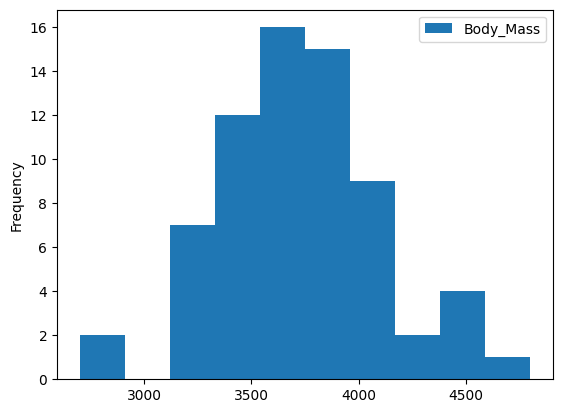

In [8]:
df_chinstrap.plot(kind="hist", y="Body_Mass")

In [ ]:
# シャピロ - ウィルク検定によって外れ値を検出する
import scipy.stats as stats

stats.shapiro(df_chinstrap.loc[:, "Body_Mass"])
# ⇒ p値が十分に大きければ、正規分布に従うことが棄却されない
# この基準(有意水準)αは一般的に0.05

ShapiroResult(statistic=np.float64(0.984493761674102), pvalue=np.float64(0.5605082387697975))

In [11]:
stats.shapiro(df_chinstrap.loc[:, "Culmen_Length"])

ShapiroResult(statistic=np.float64(0.9752496075500775), pvalue=np.float64(0.1940925740620773))

In [12]:
stats.shapiro(df_chinstrap.loc[:, "Culmen_Depth"])

ShapiroResult(statistic=np.float64(0.9727431838425551), pvalue=np.float64(0.14178462574530526))

In [13]:
stats.shapiro(df_chinstrap.loc[:, "Flipper_Length"])

ShapiroResult(statistic=np.float64(0.9889114828625576), pvalue=np.float64(0.8106446568669051))

In [17]:
stats.shapiro(pd.Series([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]))

ShapiroResult(statistic=np.float64(0.8107879724921786), pvalue=np.float64(0.012459132293114796))

In [20]:
# 2σ範囲の上限・下限を計算してみる
sigma = df_chinstrap.loc[:, "Body_Mass"].std()
avg = df_chinstrap.loc[:, "Body_Mass"].mean()
print(f"下限={avg - 2 * sigma}, 上限={avg + 2 * sigma}")

下限=2964.418072519735, 上限=4501.7583980685


In [21]:
# 比較として2.5%点と97.5%点を計算してみる
df_chinstrap.loc[:, "Body_Mass"].quantile(q=[0.025, 0.975])

0.025    3102.50
0.975    4516.25
Name: Body_Mass, dtype: float64

In [31]:
# 外れ値への対処法
# 下限値/上限値を下回る/上回る要素を、下限値/上限値に置き換える
df_chinstrap = df_chinstrap.assign(
    Body_Mass_Clipped=df_chinstrap.loc[:, "Body_Mass"].clip(
        lower=avg - 2 * sigma,
        upper=avg + 2 * sigma,
    )
)
df_chinstrap[df_chinstrap["Body_Mass"] != df_chinstrap["Body_Mass_Clipped"]]

,Species,Island,Individual_ID,Date_Egg,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Sex,Comments,Species_Short,Body_Mass_Clipped
298,Chinstrap penguin (Pygoscelis antarctica),Dream,N85A1,2007-11-28,43.2,16.6,187.0,2900.0,FEMALE,Nest never observed with full clutch.,Chinstrap,2964.418073
305,Chinstrap penguin (Pygoscelis antarctica),Dream,N62A2,2008-11-14,52.8,20.0,205.0,4550.0,MALE,None,Chinstrap,4501.758398
313,Chinstrap penguin (Pygoscelis antarctica),Dream,N69A2,2008-11-14,52.0,20.7,210.0,4800.0,MALE,None,Chinstrap,4501.758398
314,Chinstrap penguin (Pygoscelis antarctica),Dream,N72A1,2008-11-24,46.9,16.6,192.0,2700.0,FEMALE,Nest never observed with full clutch.,Chinstrap,2964.418073


In [32]:
px.histogram(
    df_chinstrap.melt(
        id_vars="Individual_ID",
        value_vars=["Body_Mass", "Body_Mass_Clipped"],
    ),
    x="value",
    facet_col="variable",
)